In [1]:
import pandas as pd
file=pd.read_csv('mnist_train.csv')
print(file.shape)
print(file)


(60000, 785)
       label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...    28x19  \
0          5    0    0    0    0    0    0    0    0    0  ...        0   
1          0    0    0    0    0    0    0    0    0    0  ...        0   
2          4    0    0    0    0    0    0    0    0    0  ...        0   
3          1    0    0    0    0    0    0    0    0    0  ...        0   
4          9    0    0    0    0    0    0    0    0    0  ...        0   
5          2    0    0    0    0    0    0    0    0    0  ...        0   
6          1    0    0    0    0    0    0    0    0    0  ...        0   
7          3    0    0    0    0    0    0    0    0    0  ...        0   
8          1    0    0    0    0    0    0    0    0    0  ...        0   
9          4    0    0    0    0    0    0    0    0    0  ...        0   
10         3    0    0    0    0    0    0    0    0    0  ...        0   
11         5    0    0    0    0    0    0    0    0    0  ...        0   
12         3

In [2]:
mnist=dict()
print(file.columns)
mnist['data']=file
#del mnist['data']['label']
mnist['target']=file['label']

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [3]:
del mnist['data']['label']

In [4]:
print(mnist['data'])

       1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...    28x19  28x20  \
0        0    0    0    0    0    0    0    0    0     0  ...        0      0   
1        0    0    0    0    0    0    0    0    0     0  ...        0      0   
2        0    0    0    0    0    0    0    0    0     0  ...        0      0   
3        0    0    0    0    0    0    0    0    0     0  ...        0      0   
4        0    0    0    0    0    0    0    0    0     0  ...        0      0   
5        0    0    0    0    0    0    0    0    0     0  ...        0      0   
6        0    0    0    0    0    0    0    0    0     0  ...        0      0   
7        0    0    0    0    0    0    0    0    0     0  ...        0      0   
8        0    0    0    0    0    0    0    0    0     0  ...        0      0   
9        0    0    0    0    0    0    0    0    0     0  ...        0      0   
10       0    0    0    0    0    0    0    0    0     0  ...        0      0   
11       0    0    0    0   

In [5]:
mnist['data']=mnist['data'].values
mnist['target']=mnist['target'].values

In [6]:
print(mnist)

{'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'target': array([5, 0, 4, ..., 5, 6, 8])}


In [7]:
X,y=mnist['data'],mnist['target']

In [8]:
X.shape

(60000, 784)

In [9]:
y.shape

(60000,)

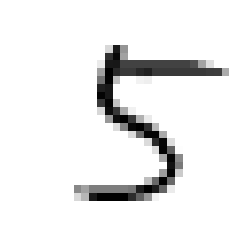

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
single=X[1288]
single=single.reshape(28,28)
plt.imshow(single, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis('off')
plt.show()

In [11]:
y[1288]

5

In [12]:
X_train,y_train,X_test,y_test=X[:50000],y[:50000],X[50000:],y[:50000]
import numpy as np
shuffle_index=np.random.permutation(50000)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

In [13]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [14]:
from sklearn.linear_model import SGDClassifier as sgd
sgd_clf=sgd(random_state=42)
sgd_clf.fit(X_train,y_train_5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
pre_5=sgd_clf.predict(X_test)

In [16]:
sgd_clf.predict([X_train[1288]])

array([ True])

In [17]:
y_train[1288]

5

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
ksfolds=StratifiedKFold(n_splits=3,random_state=42)
for train_index,test_index in ksfolds.split(X_train,y_train_5):
    clone_clf=clone(sgd_clf)
    X_folds=X_train[train_index]
    y_folds=y_train_5[train_index]
    X_test_fold=X_train[test_index]
    y_test_fold=y_train_5[test_index]
    clone_clf.fit(X_folds,y_folds)
    pre_5=clone_clf.predict(X_test_fold)
    n_correct=sum(pre_5==y_test_fold)
    print(n_correct/len(pre_5))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9674206515869682


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9560808783824324


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9488779551182047


In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(sgd_clf,X_train,y_train_5,cv=3))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and t

[0.96742065 0.95608088 0.94887796]


In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_pred)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and t

array([[44683,   811],
       [ 1316,  3190]])

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

print(precision_score(y_train_5,y_pred))#precision score

recall_score(y_train_5,y_pred)#recall score

0.7973006748312922


0.7079449622725256

In [ ]:
f1_score(y_train_5,y_pred)

0.7499706124368168

In [ ]:
threshold=0
y_pred=(sgd_clf.decision_function(X_train)>threshold)
print('precision score',precision_score(y_train_5,y_pred))#precision score
print('recall score',recall_score(y_train_5,y_pred))#recall score

precision score 0.8885161290322581
recall score 0.764092321349312


In [ ]:
threshold=-100000
y_pred=(sgd_clf.decision_function(X_train)>threshold)
print('precision score',precision_score(y_train_5,y_pred))#precision score
print('recall score',recall_score(y_train_5,y_pred))#recall score

precision score 0.6594014313597918
recall score 0.8996893031513538


In [ ]:
threshold=100000
y_pred=(sgd_clf.decision_function(X_train)>threshold)
print('precision score',precision_score(y_train_5,y_pred))#precision score
print('recall score',recall_score(y_train_5,y_pred))#recall score

precision score 0.9679122664500406
recall score 0.5288504216600088


In [ ]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')
y_scores

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and t

array([-933887.85726544, -553789.32687132, -786701.99745058, ...,
       -980293.22297624, -719108.26928773, -466014.43560351])

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

In [ ]:
precisions

array([0.09058015, 0.09056187, 0.09056369, ..., 1.        , 1.        ,
       1.        ])

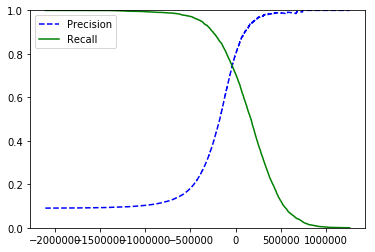

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel="Threshold"
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

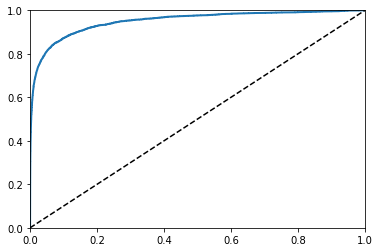

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)
def plot_precision_recall_vs_threshold(fpr,tpr, label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel=('False Positive Rate')
    plt.ylabel=('True Positive Rate')
plot_precision_recall_vs_threshold(fpr,tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_scores)

0.9504652394034451

In [ ]:
from sklearn.linear_model import SGDClassifier
clf=SGDClassifier()

from sklearn.model_selection import cross_val_score
cross_val_score(clf,X_train,y_train,cv=3)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and t

array([0.80946667, 0.87592248, 0.86953913])

In [ ]:
clf.fit(X_train,y_train)
clf.decision_function(X_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([[-1051103.71593394,  -856751.18358505,  -163019.67668273, ...,
         -869583.55987575,  -714451.72880132,  -598724.35641675],
       [ -834158.42929935,  -644783.72554738,   662346.95824405, ...,
        -1087214.70581656,  -318845.57100788,  -651163.68884437],
       [ -676250.90775544, -1250258.12982784,  -687777.82312952, ...,
          421868.23873693,  -799246.5287806 ,  -485192.11126838],
       ...,
       [-1015534.84912571,  -205433.32972908,     5320.63543004, ...,
        -1194719.4767519 ,  -716711.93700932, -1508127.70065314],
       [ -936236.36586483,  -785703.21128238,   -19271.09601112, ...,
         -627687.25750006,  -564583.08390633,  -459525.75403189],
       [-1060893.99398286,   182970.13004563,  -149875.08248117, ...,
         -262858.03507289,  -183804.31586345,  -301604.5670949 ]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rand
forest_clf=rand()
forest_clf.fit(X_train,y_train)
y_pred=forest_clf.predict(X_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
y_pred

array([6, 2, 7, ..., 3, 6, 1])

In [ ]:
cross_val_score(forest_clf,X_train,y_train,cv=3)

array([0.935749  , 0.93682126, 0.93680989])

In [ ]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
X_train_scaled=standard.fit_transform(X_train.astype(np.float64))
clf=SGDClassifier()

from sklearn.model_selection import cross_val_score
cross_val_score(clf,X_train_scaled,y_train,cv=3)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and t

array([0.90533325, 0.90814184, 0.90890542])

In [ ]:
'''
from sklearn.model_selection import GridSearchCV as grid
param_grid=[{'alpha':[0.0001,0.001,0.01],'epsilon':[0.2,0.1]}]
grid_search=grid(clf,param_grid,cv=4,scoring='neg_mean_squared_error')
grid_search.fit(X_train,y_train)
'''

"\nfrom sklearn.model_selection import GridSearchCV as grid\nparam_grid=[{'alpha':[0.0001,0.001,0.01],'epsilon':[0.2,0.1]}]\ngrid_search=grid(clf,param_grid,cv=4,scoring='neg_mean_squared_error')\ngrid_search.fit(X_train,y_train)\n"

In [ ]:
'''
print(grid_search.best_params_)
print(grid_search.cv_results_)
'''

'\nprint(grid_search.best_params_)\nprint(grid_search.cv_results_)\n'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and t

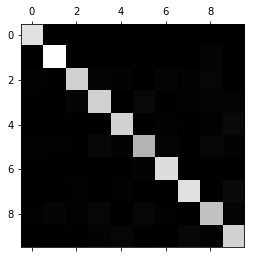

In [ ]:
y_pred=cross_val_predict(clf,X_train_scaled,y_train,cv=3)
cf_matrix=confusion_matrix(y_train,y_pred)
cf_matrix
plt.matshow(cf_matrix,cmap=plt.cm.gray)
plt.show()

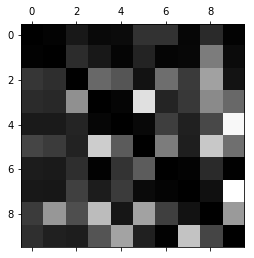

In [ ]:
cf_row_sum=cf_matrix.sum(axis=1,keepdims=True)
new_cf_matrix=cf_matrix/cf_row_sum
np.fill_diagonal(new_cf_matrix,0)
plt.matshow(new_cf_matrix,cmap=plt.cm.gray)
plt.show()

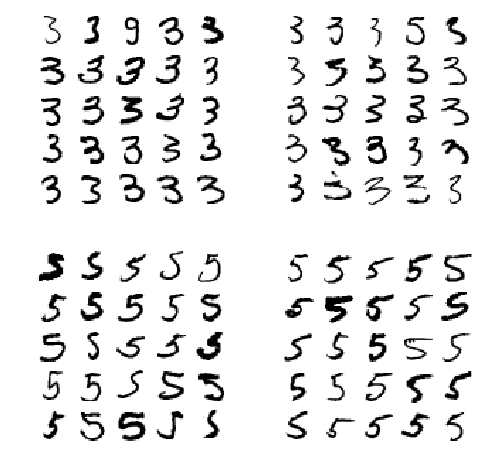

In [ ]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
y_train_pred=y_pred
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
noise=np.random.randint(0,100,size=[len(X_train),784])
X_train_noise=(X_train+noise)
X_test_noise=X_test+noise[:len(X_test)]

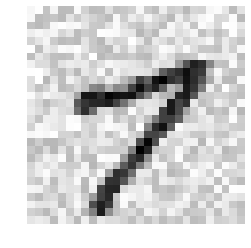

In [ ]:
plt.imshow(X_train_noise[50].reshape(28,28),cmap=matplotlib.cm.binary )
plt.axis('off')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as knn
knn_clf=knn()
knn_clf.fit(X_train_noise,X_train)
noise_pred=knn_clf.predict(X_train_noise)
print(noise_pred)

In [ ]:
plt.imshow(noise_pred[50].reshape(28,28),cmap=matplotlib.cm.binary)
plt.show()

In [ ]:
'finished'